In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn import datasets

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from bench_gm_loan import bench_gm
from sklearn.mixture import GaussianMixture

In [2]:
data_all = pd.read_csv('data_all.csv')
X = data_all.drop(columns='Loan_Status')
Y = data_all['Loan_Status']
col_names = X.columns
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(X_scaled, columns=col_names)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
all_data = X.to_numpy()
all_labels = Y.to_numpy()
data = X_train.to_numpy()
test_data = X_test.to_numpy()
labels = Y_train.to_numpy()
test_labels = Y_test.to_numpy()


(n_samples, n_features), n_digits = all_data.shape, np.unique(all_labels).size
print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 2; # samples: 373; # features 11


In [4]:
n_components = min(7, n_features)


# Dimensionality Reduction
pca = PCA(n_components=n_components).fit(all_data)
pca_data = pca.transform(data)
pca_test_data = pca.transform(test_data)

ica = FastICA(n_components=n_components).fit(all_data)
ica_data = ica.transform(data)
ica_test_data = ica.transform(test_data)

rp = GaussianRandomProjection(n_components=n_components).fit(all_data)
rp_data = rp.transform(data)
rp_test_data = rp.transform(test_data)

lda = LinearDiscriminantAnalysis(n_components=min(n_digits, n_features)-1).fit(all_data, all_labels)
lda_data = lda.transform(data)
lda_test_data = lda.transform(test_data)

C:\Users\ZhangshiLiu\anaconda3\envs\a3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [ ]:
#pca, ica, rp, lda
data = pca_data
test_data =pca_test_data

In [ ]:
"""
NNC = MLPClassifier(solver='adam', random_state=0, max_iter=100000,n_iter_no_change=2000)
param_grid = {'hidden_layer_sizes': [(16,32,8,4)],
              'learning_rate_init':[1e-4],
              'alpha':[4],
              'activation':['relu']}
nn = GridSearchCV(estimator=NNC,
                  param_grid=param_grid,
                  cv=5)
nn.fit(data, labels)

nn_model = nn.best_estimator_
print(nn_model)
nn_model.fit(data, labels)

score = nn_model.score(data, labels)
print("Training: accuracy %0.4f" % (score))
score = nn_model.score(test_data, test_labels)
print("Testing: accuracy: %0.4f\n" % (score))

print(nn_model.activation)




fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(nn_model.loss_curve_)
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Loss')
plt.ylim(0,1)
plt.show()
"""
nn_model = MLPClassifier(alpha=4, hidden_layer_sizes=(16, 32, 8, 4),
              learning_rate_init=0.0001, max_iter=100000, n_iter_no_change=2000,
              random_state=0, early_stopping=True)

nn_model.fit(data, labels)

score = nn_model.score(data, labels)
print("Training: accuracy %0.4f" % (score))
score = nn_model.score(test_data, test_labels)
print("Testing: accuracy: %0.4f\n" % (score))



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(nn_model.loss_curve_)
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Loss')
plt.ylim(0,1)

ax[1].plot(nn_model.validation_scores_)
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Accuracy')

plt.ylim(0,1)
plt.show()
nn_model.validation_scores_[-1]

In [ ]:
"""
nn_model = MLPClassifier(solver='adam', hidden_layer_sizes=(16,32,8,4), alpha=4, n_iter_no_change=2000, early_stopping=True, learning_rate_init=0.0001,random_state=0, max_iter=200000)
start = time.time()
nn_model.fit(data, labels)
stop = time.time()
print("Training Time: ", (stop-start))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(nn_model.loss_curve_)
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Loss')
plt.ylim(0,1)


ax[1].plot(nn_model.validation_scores_)
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Accuracy')

plt.ylim(0,1)
plt.show()
nn_model.validation_scores_[-1]
"""

In [5]:
n_init = 5
n_digits = 7


vanilla_gm = GaussianMixture(n_components=n_digits, n_init=n_init, random_state=0).fit(data)
new_data = vanilla_gm.predict_proba(data)
new_test_data = vanilla_gm.predict_proba(test_data)


# kmeans + PCA
pca_gm = GaussianMixture(n_components=n_digits, n_init=n_init, random_state=0).fit(pca_data)
new_pca_data = pca_gm.predict_proba(pca_data)
new_pca_test_data = pca_gm.predict_proba(pca_test_data)

# kmeans + ICA
ica_gm = GaussianMixture(n_components=n_digits, n_init=n_init, random_state=0).fit(ica_data)
new_ica_data = ica_gm.predict_proba(ica_data)
new_ica_test_data = ica_gm.predict_proba(ica_test_data)


# kmeans + random projection
rp_gm = GaussianMixture(n_components=n_digits, n_init=n_init, random_state=0).fit(rp_data)
new_rp_data = rp_gm.predict_proba(rp_data)
new_rp_test_data = rp_gm.predict_proba(rp_test_data)



# kmeans + LDA
lda_gm = GaussianMixture(n_components=n_digits, n_init=n_init, random_state=0).fit(lda_data)
new_lda_data = lda_gm.predict_proba(lda_data)
new_lda_test_data = lda_gm.predict_proba(lda_test_data)


C:\Users\ZhangshiLiu\anaconda3\envs\a3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZhangshiLiu\anaconda3\envs\a3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZhangshiLiu\anaconda3\envs\a3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZhangshiLiu\anaconda3\envs\a3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: User

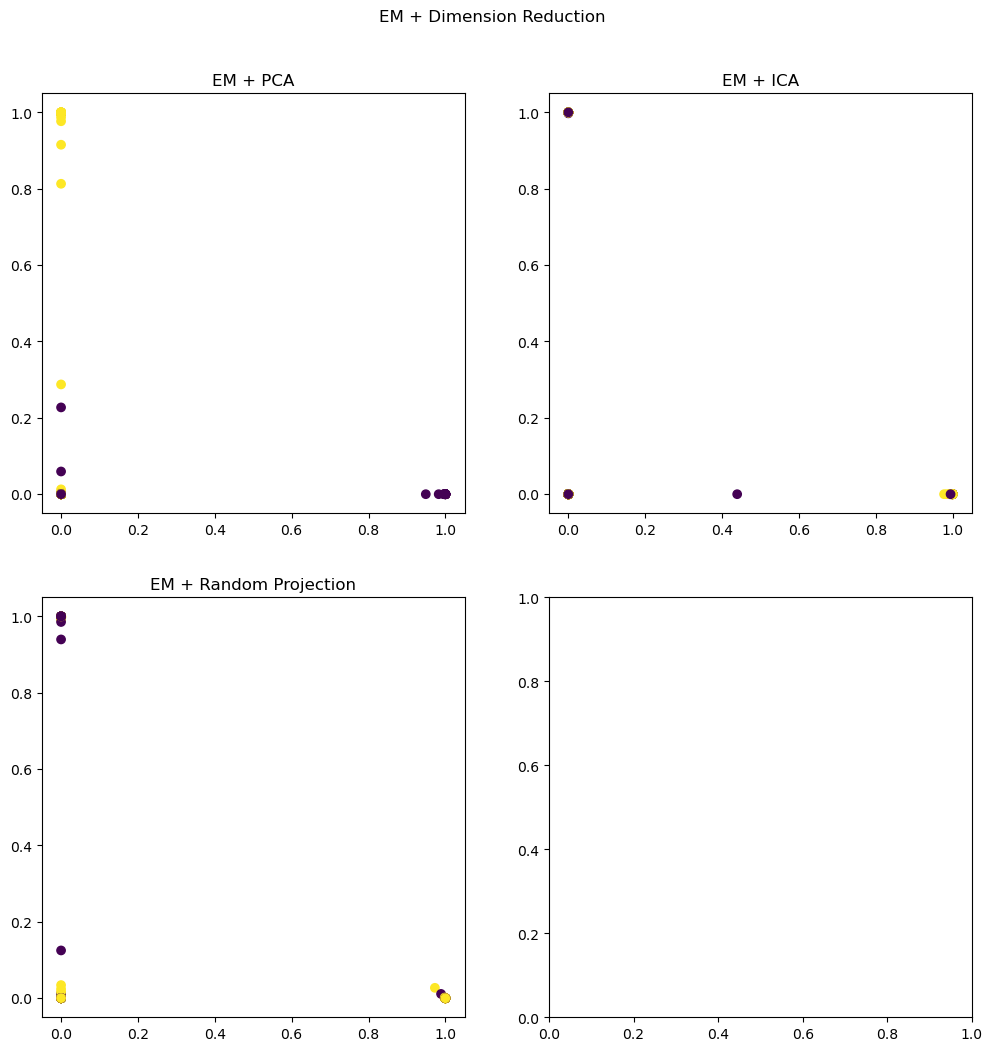

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(new_pca_data[:, 0], new_pca_data[:, 1], c=labels)
axs[0, 0].set_title("EM + PCA")

axs[0, 1].scatter(new_ica_data[:, 0], new_ica_data[:, 1], c=labels)
axs[0, 1].set_title("EM + ICA")

axs[1, 0].scatter(new_rp_data[:, 0], new_rp_data[:, 1], c=labels)
axs[1, 0].set_title("EM + Random Projection")

# axs[1, 1].scatter(lda_data[:, 0], lda_data[:, 1], c=labels)
# axs[1, 1].set_title("LDA")

plt.suptitle("EM + Dimension Reduction").set_y(0.95)
plt.show()

In [18]:
new_data = new_lda_data
new_test_data = new_lda_test_data

Training: accuracy 0.8154
Testing: accuracy: 0.7333



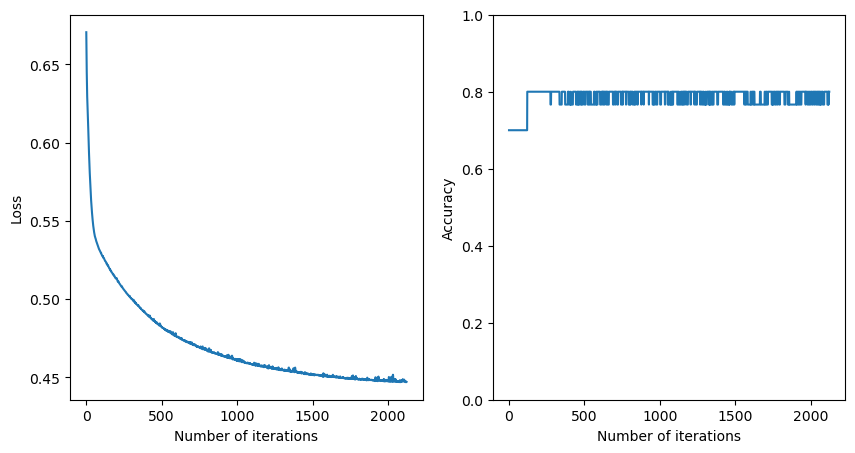

0.8

In [19]:
nn_model = MLPClassifier(alpha=0.1, hidden_layer_sizes=(16, 32, 8, 4),
              learning_rate_init=0.001, max_iter=100000, n_iter_no_change=2000,
              random_state=0, early_stopping=True)

nn_model.fit(new_data, labels)

score = nn_model.score(new_data, labels)
print("Training: accuracy %0.4f" % (score))
score = nn_model.score(new_test_data, test_labels)
print("Testing: accuracy: %0.4f\n" % (score))



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(nn_model.loss_curve_)
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Loss')
plt.ylim(0,1)

ax[1].plot(nn_model.validation_scores_)
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Accuracy')

plt.ylim(0,1)
plt.show()
nn_model.validation_scores_[-1]

In [ ]:
"""
NNC = MLPClassifier(solver='adam', random_state=0, max_iter=100000,n_iter_no_change=2000, verbose=0)
param_grid = {'hidden_layer_sizes': [(16,32,8,4)],
              'learning_rate_init':[1e-3],
              'alpha':[0.1],
              'activation':['relu']}
nn = GridSearchCV(estimator=NNC,
                  param_grid=param_grid,
                  cv=5)
nn.fit(new_data, labels)

nn_model = nn.best_estimator_
print(nn_model)
nn_model.fit(new_data, labels)

score = nn_model.score(new_data, labels)
print("Training: accuracy %0.4f" % (score))
score = nn_model.score(new_test_data, test_labels)
print("Testing: accuracy: %0.4f\n" % (score))

print(nn_model.activation)




fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(nn_model.loss_curve_)
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Loss')
plt.ylim(0,1)
plt.show()
"""


In [ ]:
nn_model = MLPClassifier(solver='adam', hidden_layer_sizes=(16,32,8,4), alpha=4, n_iter_no_change=2000, early_stopping=True, learning_rate_init=0.0001,random_state=0, max_iter=200000)
start = time.time()
nn_model.fit(data, labels)
stop = time.time()
print("Training Time: ", (stop-start))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].plot(nn_model.loss_curve_)
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel('Loss')
plt.ylim(0,1)


ax[1].plot(nn_model.validation_scores_)
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Accuracy')

plt.ylim(0,1)
plt.show()
nn_model.validation_scores_[-1]